In [ ]:
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds


In [ ]:

def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function

# 環境適應度
# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)

# 轉換
# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# 適者生存不適者淘汰 回傳存活
def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

#配對
def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent

#變異
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child




In [ ]:
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA

[6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.41700332 6.43053039 6.43053039
 6.41700332 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.41700332 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.41700332 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.41700332 6.43053039 6.43053039 6.41700332 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039 6.43053039
 6.43053039 6.43053039 6.41700332 6.41700332 6.43053039 6.4305

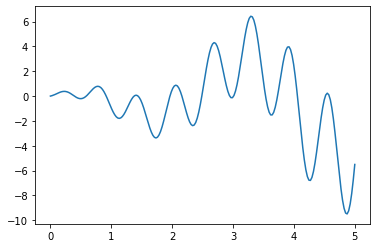

In [40]:

# plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)  # *跌代陣列裡面的值
plt.plot(x, F(x))
#F(x) 計算y軸高度
F_values = F(translateDNA(pop)) 
fitness = get_fitness(F_values)
pop = select(pop, fitness)
print(F_values)
print(fitness)
print(pop)

In [43]:
for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    # something about plotting
    # if 'sca' in globals(): sca.remove()
    # sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # GA part (evolution)
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child
#[:] 為淺複製
#plt.ioff(); plt.show()

Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]


C:\Users\adamw\AppData\Local\Temp\ipykernel_4256\1810230037.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points


Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]
Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]


In [65]:
a = [1,2,3]
x = []
x[:] = a

In [68]:
a[0] = [4,4,4]
x

[1, 2, 3]